# Decomposition Methods

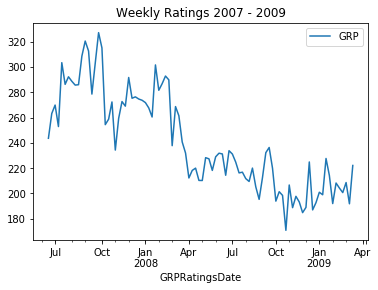

,GRP
GRPRatingsDate,
2009-02-15,204.20
2009-02-22,200.61
2009-03-01,208.56
2009-03-08,191.74
2009-03-15,222.07


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


os.chdir('/Users/pierlim/PycharmProjects/Indian_TV_Time_Series')
df = pd.read_csv("./data/ActualRatings_weeklyGRP.csv")
df = df.drop(df.columns[2], axis=1)
split_str = df['GRPRatingsDate'].str.split('(')
df['GRPRatingsDate'] = split_str.str[0]
df['GRPRatingsDate'] = pd.to_datetime(df['GRPRatingsDate'])

df = df.set_index('GRPRatingsDate')
df.plot()
plt.title('Weekly Ratings 2007 - 2009')
plt.show()
df.tail()

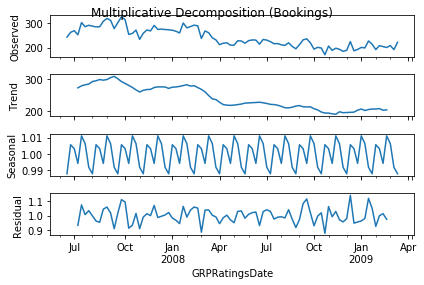

In [14]:
decomp = seasonal_decompose(df['GRP'], freq=7, model='multiplicative')
decomp.plot()
plt.suptitle('Multiplicative Decomposition (Bookings)')
plt.show()


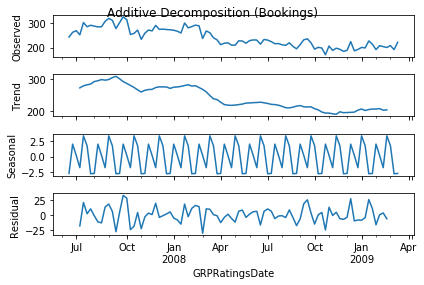

In [16]:
decomp = seasonal_decompose(df['GRP'], freq=7, model='additive')
decomp.plot()
plt.suptitle('Additive Decomposition (Bookings)')
plt.show()


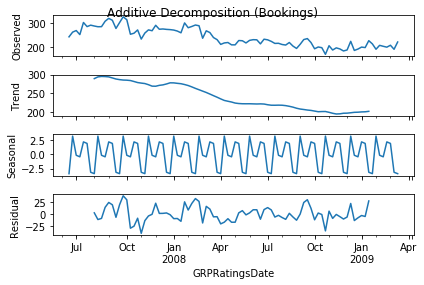

In [21]:
# Try increasing the filter order 

freq = 15
filt_fn = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
filt_fn
decomp = seasonal_decompose(df['GRP'], freq=7, model='additive', filt=filt_fn)
decomp.plot()
plt.suptitle('Additive Decomposition (Bookings)')
plt.show()